In [1]:
# Importing necessary libraries & modules; checking system compatibility
import sys, pip, numpy as np, pandas as pd, matplotlib.pyplot as plt
from streaming_func import clean_streaming_df, unique_actors_per_genre
from pathlib import Path

In [2]:
# Loading Netflix dataset & info for understanding of present structure & content
DATA_DIR = Path("data")
netflix_df = pd.read_csv(DATA_DIR / "netflix_titles.csv")

print(netflix_df.head(), '\n')
print(netflix_df.info())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [3]:
# Extracting unique media types from the 'listed_in' column to check for any anomalous genre types & entries
unique_netflix_genre_types = netflix_df.listed_in.unique()
unique_netflix_media_types = netflix_df.type.unique()

# Displaying unique media types in the Netflix dataset
print(f'Unique media types in Netflix dataset: {[type for type in unique_netflix_media_types]} \n')

# Displaying unique media genre lists in the dataset for additional visual debugging & validation§ 
print(f"Unique media genre lists in Netflix dataset: \n{unique_netflix_genre_types}")

Unique media types in Netflix dataset: ['Movie', 'TV Show'] 

Unique media genre lists in Netflix dataset: 
['Documentaries' 'International TV Shows, TV Dramas, TV Mysteries'
 'Crime TV Shows, International TV Shows, TV Action & Adventure'
 'Docuseries, Reality TV'
 'International TV Shows, Romantic TV Shows, TV Comedies'
 'TV Dramas, TV Horror, TV Mysteries' 'Children & Family Movies'
 'Dramas, Independent Movies, International Movies'
 'British TV Shows, Reality TV' 'Comedies, Dramas'
 'Crime TV Shows, Docuseries, International TV Shows'
 'Dramas, International Movies' 'Children & Family Movies, Comedies'
 'British TV Shows, Crime TV Shows, Docuseries' 'TV Comedies, TV Dramas'
 'Documentaries, International Movies'
 'Crime TV Shows, Spanish-Language TV Shows, TV Dramas' 'Thrillers'
 'International TV Shows, Spanish-Language TV Shows, TV Action & Adventure'
 'International TV Shows, TV Action & Adventure, TV Dramas'
 'Comedies, International Movies'
 'Comedies, International Movies, R

In [4]:
# Preliminary check of unique countries in the 'country' column
unique_netflix_countries = netflix_df.country.unique()
print("Countries list for Netflix dataset accredited locations of media production: \n", unique_netflix_countries)

Countries list for Netflix dataset accredited locations of media production: 
 ['United States' 'South Africa' nan 'India'
 'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia'
 'United Kingdom' 'Germany, Czech Republic' 'Mexico' 'Turkey' 'Australia'
 'United States, India, France' 'Finland' 'China, Canada, United States'
 'South Africa, United States, Japan' 'Nigeria' 'Japan'
 'Spain, United States' 'France' 'Belgium' 'United Kingdom, United States'
 'United States, United Kingdom' 'France, United States' 'South Korea'
 'Spain' 'United States, Singapore' 'United Kingdom, Australia, France'
 'United Kingdom, Australia, France, United States'
 'United States, Canada' 'Germany, United States'
 'South Africa, United States' 'United States, Mexico'
 'United States, Italy, France, Japan'
 'United States, Italy, Romania, United Kingdom'
 'Australia, United States' 'Argentina, Venezuela'
 'United States, United Kingdom, Canada' 'China, Hong Kong' 'Russia'
 'Canada' 'Hong Ko

In [5]:
# Data cleaning function for Amazon Prime dataset for easier exploration & manipulation

test_netflix_df = clean_streaming_df(netflix_df)
print(test_netflix_df.head(), '\n')
print(test_netflix_df.info())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast          country  \
0                                                 []  [United States]   
1  [Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...   [South Africa]   
2  [Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...               []   
3                                                 []               []   
4  [Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...          [India]   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 

In [6]:
# Extracting unique countries from the 'country' column for Amazon Prime dataset
netflix_countries = test_netflix_df["country"]

netflix_countries_unique = []
for country_list in netflix_countries:
    for country in country_list:
        if country not in netflix_countries_unique:
            netflix_countries_unique.append(country)

print(netflix_countries_unique, '\n')
print(f'Total number unique countries for Netflix media production: {len(netflix_countries_unique)}')

['United States', 'South Africa', 'India', 'Ghana', 'Burkina Faso', 'United Kingdom', 'Germany', 'Ethiopia', 'Czech Republic', 'Mexico', 'Turkey', 'Australia', 'France', 'Finland', 'China', 'Canada', 'Japan', 'Nigeria', 'Spain', 'Belgium', 'South Korea', 'Singapore', 'Italy', 'Romania', 'Argentina', 'Venezuela', 'Hong Kong', 'Russia', '', 'Ireland', 'Nepal', 'New Zealand', 'Brazil', 'Greece', 'Jordan', 'Colombia', 'Switzerland', 'Israel', 'Taiwan', 'Bulgaria', 'Algeria', 'Poland', 'Saudi Arabia', 'Thailand', 'Indonesia', 'Egypt', 'Denmark', 'Kuwait', 'Netherlands', 'Malaysia', 'Vietnam', 'Hungary', 'Sweden', 'Lebanon', 'Syria', 'Philippines', 'Iceland', 'United Arab Emirates', 'Norway', 'Qatar', 'Mauritius', 'Austria', 'Cameroon', 'Palestine', 'Uruguay', 'Kenya', 'Chile', 'Luxembourg', 'Cambodia', 'Bangladesh', 'Portugal', 'Cayman Islands', 'Senegal', 'Serbia', 'Malta', 'Namibia', 'Angola', 'Peru', 'Mozambique', 'Belarus', 'Zimbabwe', 'Puerto Rico', 'Pakistan', 'Cyprus', 'Guatemala', '

In [7]:
# Movies-only DataFrame
test_movies_df = test_netflix_df[test_netflix_df["type"] == "Movie"].copy()

# TV-Shows-only DataFrame
test_tv_shows_df = test_netflix_df[test_netflix_df["type"] == "TV Show"].copy()

print("Movies:", len(test_movies_df))
print("TV Shows:", len(test_tv_shows_df))

Movies: 6131
TV Shows: 2676


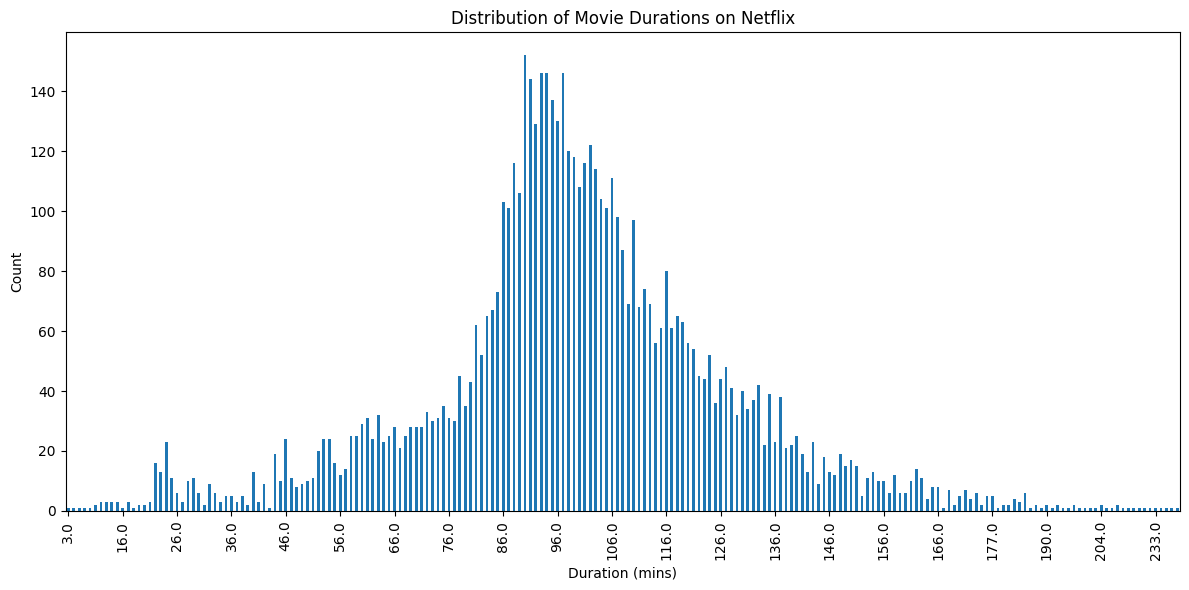

In [8]:
# Netflix Movies duration distribution plot
movies_ax = test_movies_df.groupby("duration_mins").size().plot(kind="bar", figsize=(12,6))

movies_ax.set_xticks(movies_ax.get_xticks()[::len(movies_ax.get_xticks()) // 20])
movies_ax.set_title("Distribution of Movie Durations on Netflix")
movies_ax.set_xlabel("Duration (mins)")
movies_ax.set_ylabel("Count")

plt.tight_layout()
plt.show()

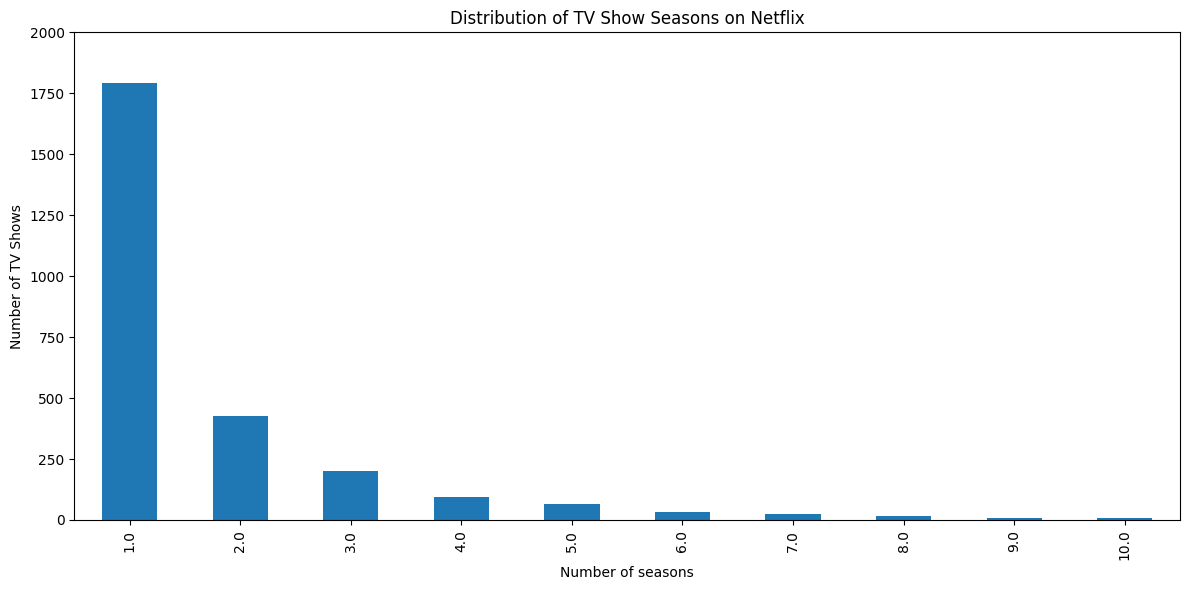

In [9]:
# Filtering for TV shows with 10 seasons or less, as few tv shows ever suceed enough to exceed this number
filtered_tv = test_tv_shows_df[test_tv_shows_df["duration_seasons"] <= 10]

shows_ax = filtered_tv.groupby("duration_seasons").size().plot(kind="bar", figsize=(12,6))

shows_ax.set_xticks(shows_ax.get_xticks()[::len(shows_ax.get_xticks()) // 10])
shows_ax.set_yticks(shows_ax.get_yticks()[::len(shows_ax.get_yticks()) // 8])
shows_ax.set_title("Distribution of TV Show Seasons on Netflix")
shows_ax.set_xlabel("Number of seasons")
shows_ax.set_ylabel("Number of TV Shows")
plt.tight_layout()
plt.show()

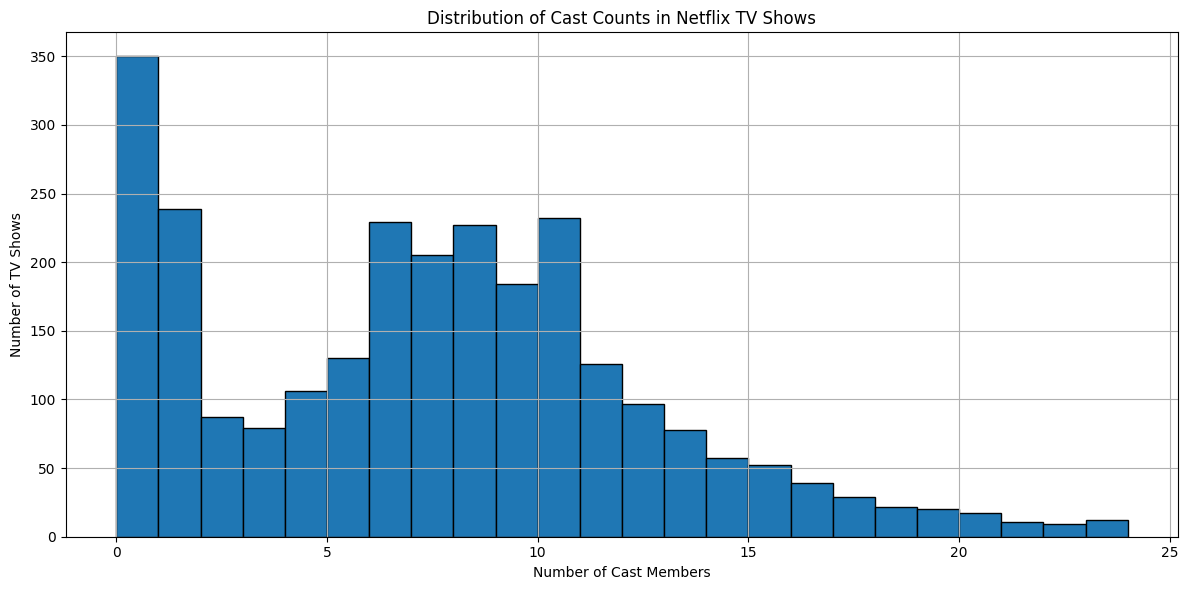

In [10]:
# Netflix TV Shows cast count distribution plot

test_tv_shows_df["cast_count"] = test_tv_shows_df["cast"].apply(len)
test_tv_shows_df["cast_count"].hist(bins=range(0, 25), edgecolor='black', figsize=(12,6))
plt.title("Distribution of Cast Counts in Netflix TV Shows")
plt.xlabel("Number of Cast Members")
plt.ylabel("Number of TV Shows")
plt.tight_layout()
plt.show()

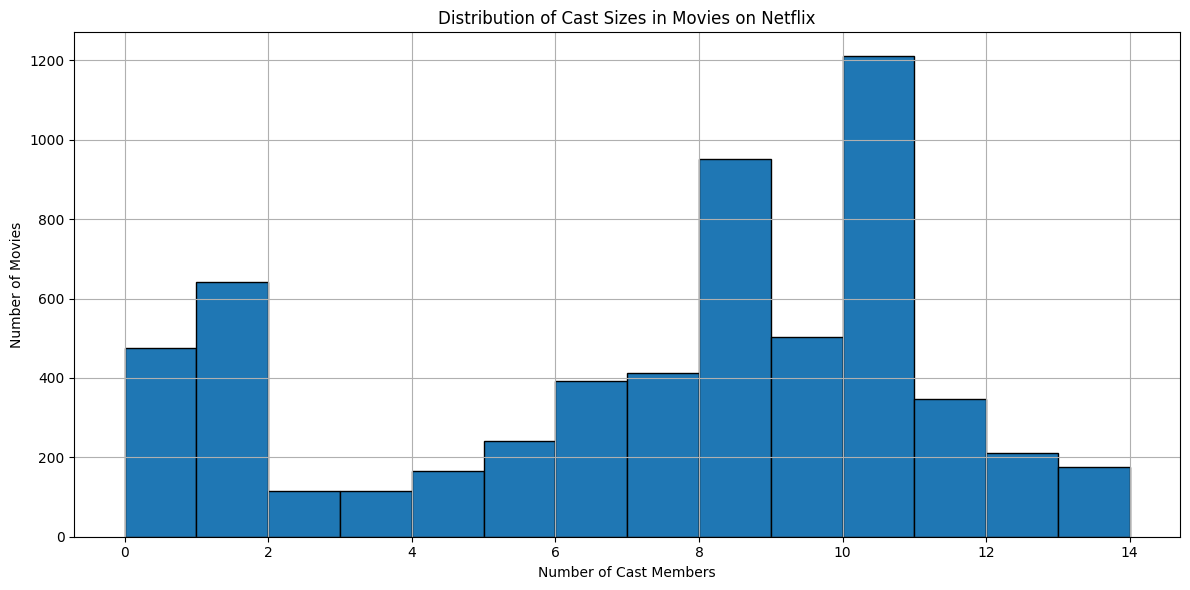

In [11]:
# # Movies cast size distribution (focused more specifically on casts with 15 or less members, due to their more recorded frequent occurrences)
test_movies_df["cast_count"] = test_movies_df["cast"].apply(len)
test_movies_df["cast_count"].hist(bins=range(0, 15), edgecolor='black', figsize=(12,6))

plt.xlabel("Number of Cast Members")
plt.ylabel("Number of Movies")
plt.title("Distribution of Cast Sizes in Movies on Netflix")

plt.tight_layout()
plt.show()

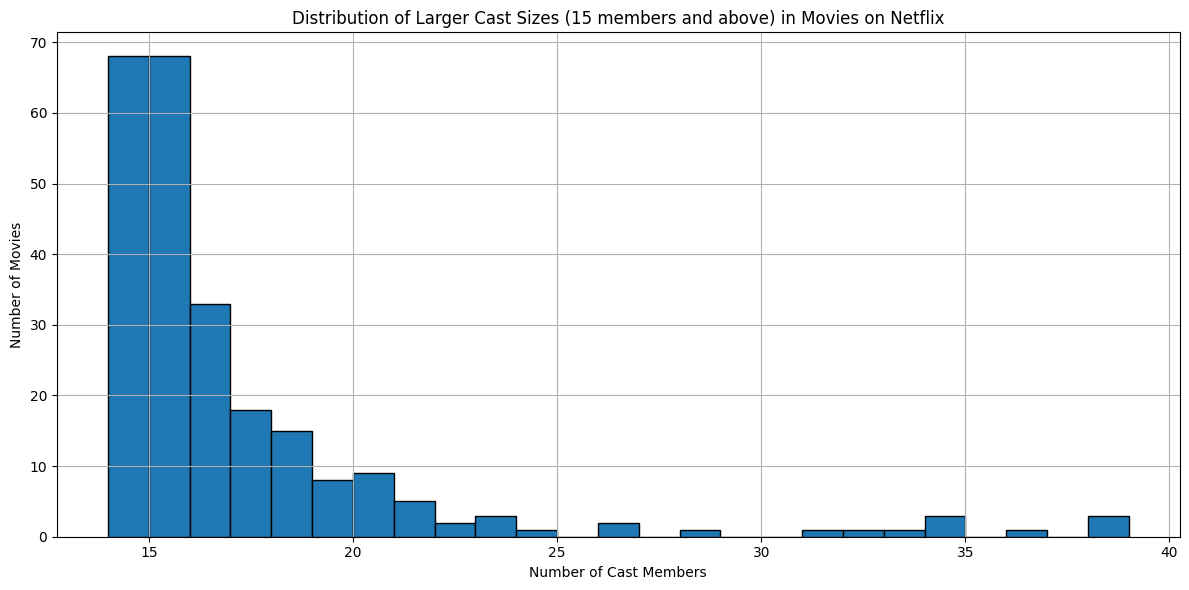

In [12]:
# Movies cast size distribution (focused more specifically on larger casts, due to their less frequent occurrence)

test_movies_df["cast_count"].hist(bins=range(14, 40), edgecolor='black', figsize=(12,6))

plt.xlabel("Number of Cast Members")
plt.ylabel("Number of Movies")
plt.title("Distribution of Larger Cast Sizes (15 members and above) in Movies on Netflix")

plt.tight_layout()
plt.show()

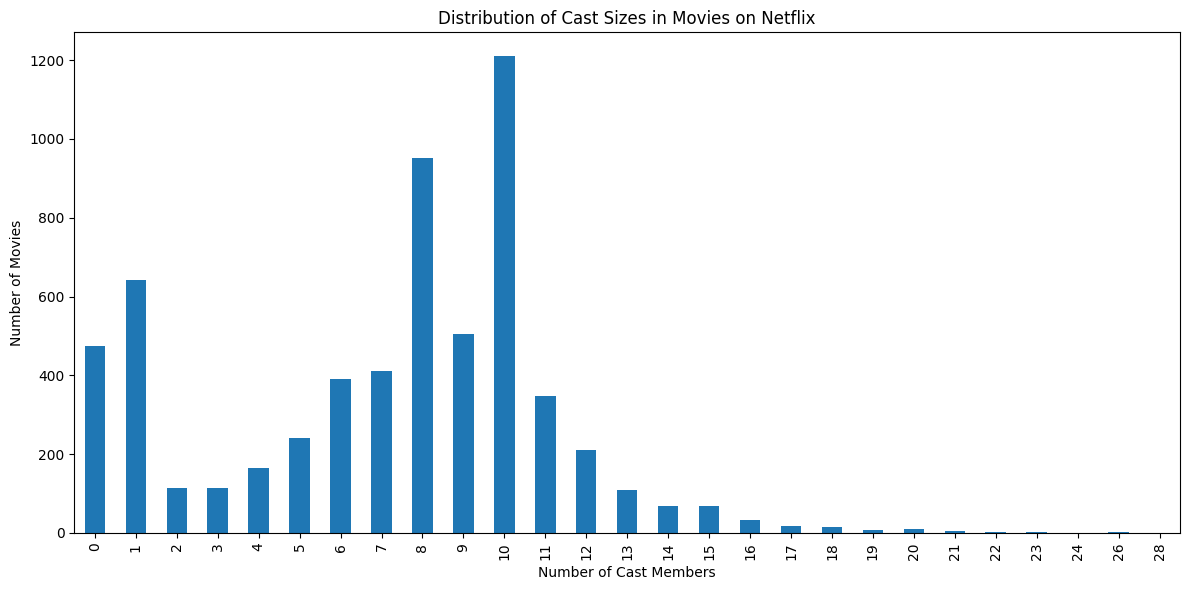

In [13]:
# Movies cast size distribution using bar plot for better visualization

test_movies_df["cast_count"] = test_movies_df["cast"].apply(len)
'''
test_movies_bar = test_movies_df.groupby("cast_count").size().plot(kind="bar", figsize=(8,4))
test_movies_bar.set_xlabel("Number of Cast Members")
test_movies_bar.set_ylabel("Number of Movies")
test_movies_bar.set_title("Distribution of Cast Sizes in Movies on Netflix")
'''

'''
several films have been recorded to have casts of 30 or more, which is most likely an error in the dataset or an inclusion of all minor roles & extras;
as a result, we'll exclude those from the visualization for better clarity & to remove potential skewing of the data & outliers
'''

test_movies_bar_sample = test_movies_df[test_movies_df["cast_count"] <= 30]
test_movies_bar_sample = test_movies_bar_sample.groupby("cast_count").size().plot(kind="bar", figsize=(12,6))
test_movies_bar_sample.set_xlabel("Number of Cast Members")
test_movies_bar_sample.set_ylabel("Number of Movies")
test_movies_bar_sample.set_title("Distribution of Cast Sizes in Movies on Netflix")
plt.tight_layout()
plt.show()

In [14]:
# Extracting unique genres from Netflix dataset
netflix_media_genres = test_netflix_df["listed_in"]
unique_netlfix_genres = []

for films in netflix_media_genres:
    for genre in films:
        
        # Check & append unique genres only
        if genre not in unique_netlfix_genres:
            unique_netlfix_genres.append(genre)

print(f'List of unique Netflix media genres: {unique_netlfix_genres}\n')
print(f'Number of unique media genres in Netflix dataset: {len(unique_netlfix_genres)}')

List of unique Netflix media genres: ['Documentaries', 'International TV Shows', 'TV Dramas', 'TV Mysteries', 'Crime TV Shows', 'TV Action & Adventure', 'Docuseries', 'Reality TV', 'Romantic TV Shows', 'TV Comedies', 'TV Horror', 'Children & Family Movies', 'Dramas', 'Independent Movies', 'International Movies', 'British TV Shows', 'Comedies', 'Spanish-Language TV Shows', 'Thrillers', 'Romantic Movies', 'Music & Musicals', 'Horror Movies', 'Sci-Fi & Fantasy', 'TV Thrillers', "Kids' TV", 'Action & Adventure', 'TV Sci-Fi & Fantasy', 'Classic Movies', 'Anime Features', 'Sports Movies', 'Anime Series', 'Korean TV Shows', 'Science & Nature TV', 'Teen TV Shows', 'Cult Movies', 'TV Shows', 'Faith & Spirituality', 'LGBTQ Movies', 'Stand-Up Comedy', 'Movies', 'Stand-Up Comedy & Talk Shows', 'Classic & Cult TV']

Number of unique media genres in Netflix dataset: 42


In [15]:
test_netflix_casts = test_netflix_df["cast"]    # Series of cast lists

# Extract unique cast members from the Netflix dataset & add to a set
test_netflix_unique_cast_members = set()

# Iterate through each cast entry in the dataset
for cast_list in test_netflix_casts:

    # cast_list is already a list (or []), thanks to clean_streaming_df
    if not cast_list:          # handles empty lists
        continue

    # Split multiple cast members & add unique ones to the set
    for actor in cast_list:

        # paranoia, but good check to have
        if not isinstance(actor, str):
            continue           

        actor = actor.strip()
        
        # skip empty strings
        if actor:  
            test_netflix_unique_cast_members.add(actor)

# Convert the set to a list for easier handling
test_netflix_unique_cast_members = list(test_netflix_unique_cast_members)

print(f"Sample of 'test_netflix_unique_cast_members' list for inspection: \n{test_netflix_unique_cast_members[:10]}\n")
print(f'Number of unique cast members in Netflix dataset: {len(test_netflix_unique_cast_members)}')

Sample of 'test_netflix_unique_cast_members' list for inspection: 
['Jorge Luis Vázquez', 'Derek Hough', 'Markin López', 'Jiiva', 'Tarık Ünlüoğlu', 'Katharina Schüttler', 'Ravi Bhushan Bhartiya', 'Nayampally', 'Eric Edelstein', 'K Prasanna']

Number of unique cast members in Netflix dataset: 36439


In [16]:
# explode netflix movie genres into separate rows
movies_df_exploded = test_movies_df.explode("listed_in").copy()

# adding cast count column to the exploded dataframe
movies_df_exploded["cast_count"] = movies_df_exploded["cast"].str.len()

# Removing empty genres that become NaN after explode, before the groupby
movies_df_exploded = movies_df_exploded[movies_df_exploded["listed_in"].notna()]

# Total number of role appearances in each genre (counting a movie once per genre)
movie_genre_cast_counts = movies_df_exploded.groupby("listed_in")["cast_count"].sum().sort_values(ascending=False)
print(f'Number of role appearances on Netflix media by genre: \n{movie_genre_cast_counts}')

Number of role appearances on Netflix media by genre: 
listed_in
Dramas                      20767
International Movies        20491
Comedies                    15185
Action & Adventure           8054
Independent Movies           6297
Children & Family Movies     5601
Romantic Movies              5214
Thrillers                    4821
Horror Movies                3066
Music & Musicals             2399
Sci-Fi & Fantasy             2291
Documentaries                1217
Sports Movies                1140
Classic Movies               1022
Cult Movies                   723
Anime Features                685
LGBTQ Movies                  662
Stand-Up Comedy               486
Faith & Spirituality          475
Movies                        289
Name: cast_count, dtype: int64


In [17]:
## Netflix TV-shows & Movies unique actors per genre count

def unique_actors_per_genre(df: pd.DataFrame) -> pd.Series:
    """
    The dataframe is expected to be a cleaned 'streaming dataframe' where:
      - df['cast'] is a list of actor names (or [])
      - df['listed_in'] is a list of genres (or [])
    
    Returns a Series indexed by genre, with the number of UNIQUE actors
    that have ever appeared in at least one title in that genre.
    """

    # Explode genres so each row has 1 genre
    exploded = df.explode("listed_in")

    # Explode cast so each row has 1 actor & 1 genre
    exploded = exploded.explode("cast")

    # Clean up: drop empty/NaN genres & actors
    exploded["listed_in"] = exploded["listed_in"].astype(str).str.strip()
    exploded["cast"] = exploded["cast"].astype(str).str.strip()

    mask = (
        exploded["listed_in"].notna() &
        (exploded["listed_in"] != "") &
        exploded["cast"].notna() &
        (exploded["cast"] != "")
    )
    exploded = exploded[mask]

    # Group by genre & count unique actors
    genre_actor_counts = (
        exploded
        .groupby("listed_in")["cast"]
        .nunique()          # <– unique actors per genre
        .sort_values(ascending=False)
    )

    return genre_actor_counts

movie_unique_actors_per_genre = unique_actors_per_genre(test_movies_df)
tv_unique_actors_per_genre = unique_actors_per_genre(test_tv_shows_df)


In [18]:
# top 10 movie genres by their number of unique actors
print(movie_unique_actors_per_genre.head(10), '\n')

# Answers how many for each movie genre, how many distinct actors have appeared in at least one movie of that genre
print(f'Number of unique actors per movie genre: {len(movie_unique_actors_per_genre)}')

listed_in
Dramas                      14228
International Movies        13443
Comedies                    10148
Action & Adventure           5793
Independent Movies           5368
Romantic Movies              4329
Thrillers                    4029
Children & Family Movies     3835
Horror Movies                2751
Music & Musicals             2029
Name: cast, dtype: int64 

Number of unique actors per movie genre: 20


In [19]:
# top 10 tv-show genres by unique actors
print(tv_unique_actors_per_genre.head(10), '\n')

# Answers how many for each tv-show genre, how many distinct actors have appeared in at least one tv-show of that genre
print(f'Number of unique actors per tv-show genre: {len(tv_unique_actors_per_genre)}')

listed_in
International TV Shows       8752
TV Dramas                    6671
TV Comedies                  3904
Crime TV Shows               3596
Romantic TV Shows            2542
Kids' TV                     2400
TV Action & Adventure        1700
Spanish-Language TV Shows    1452
British TV Shows             1159
TV Mysteries                 1045
Name: cast, dtype: int64 

Number of unique actors per tv-show genre: 22


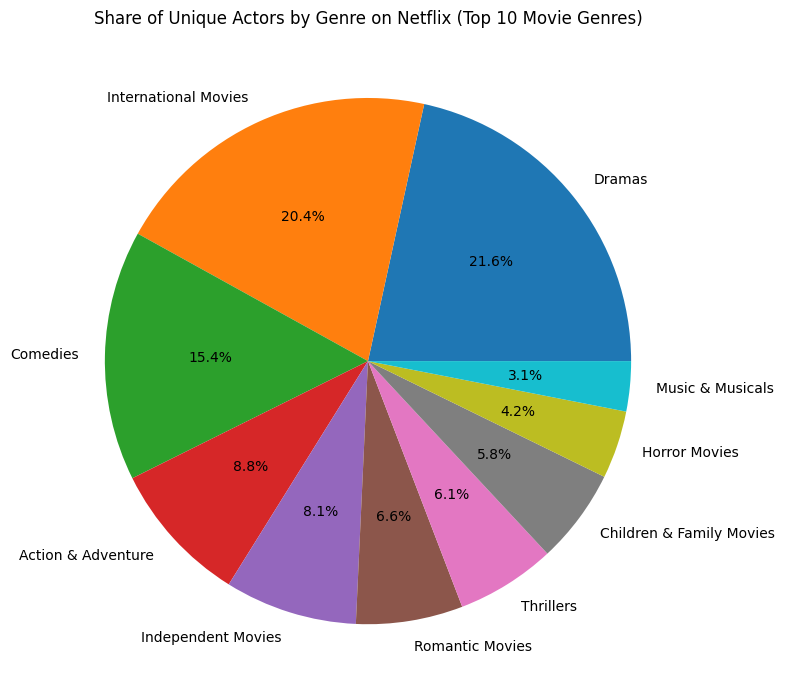

In [20]:
# Pie chart of unique actors per movie genre (top 10 genres only)

top_n = 10
top_genres = movie_unique_actors_per_genre.head(top_n)

plt.figure(figsize=(8, 8))
top_genres.plot(kind="pie", autopct="%1.1f%%")
plt.ylabel("")  # hide y-label
plt.title("Share of Unique Actors by Genre on Netflix (Top 10 Movie Genres)")
plt.tight_layout()
plt.show()

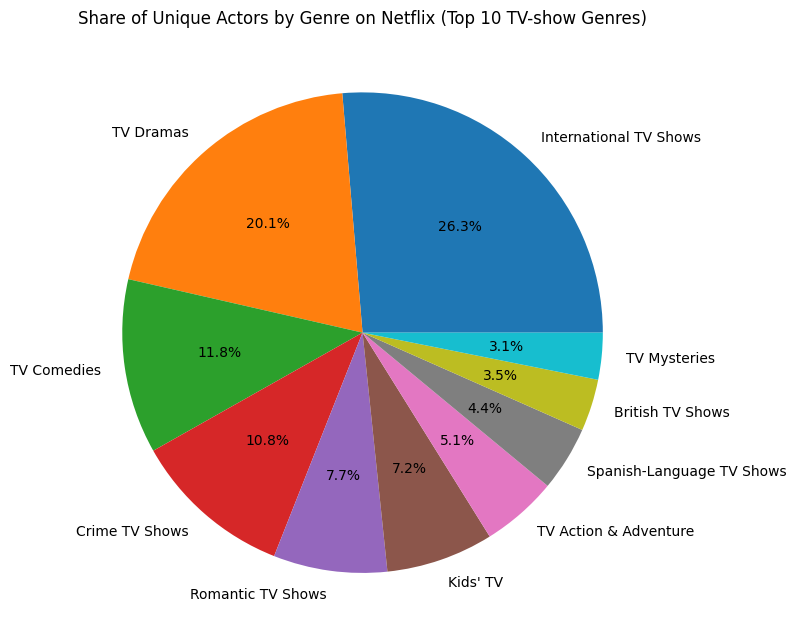

In [21]:
# Pie chart of unique actors per TV-show genre (top 10 genres only)

top_n = 10
top_genres = tv_unique_actors_per_genre.head(top_n)

plt.figure(figsize=(8, 8))
top_genres.plot(kind="pie", autopct="%1.1f%%")
plt.ylabel("")  # hide y-label
plt.title("Share of Unique Actors by Genre on Netflix (Top 10 TV-show Genres)")
plt.tight_layout()
plt.show()

In [22]:
# explode netflix tv shows genres into separate rows
shows_df_exploded = test_tv_shows_df.explode("listed_in")
shows_df_exploded["cast_count"] = shows_df_exploded["cast"].apply(len)

# sorted tv show genre cast counts by ascending order to identify genres with largest casts
show_genre_cast_counts = shows_df_exploded.groupby("listed_in")["cast_count"].sum().sort_values(ascending=False)
print(show_genre_cast_counts)

listed_in
International TV Shows          11210
TV Dramas                        7467
TV Comedies                      4458
Crime TV Shows                   3931
Kids' TV                         3210
Romantic TV Shows                2890
Anime Series                     2123
Spanish-Language TV Shows        1813
TV Action & Adventure            1786
British TV Shows                 1379
TV Mysteries                     1083
Korean TV Shows                  1058
TV Sci-Fi & Fantasy               864
TV Horror                         816
Teen TV Shows                     739
TV Thrillers                      599
Docuseries                        526
Reality TV                        486
Stand-Up Comedy & Talk Shows      253
Classic & Cult TV                 240
TV Shows                           97
Science & Nature TV                95
Name: cast_count, dtype: int64


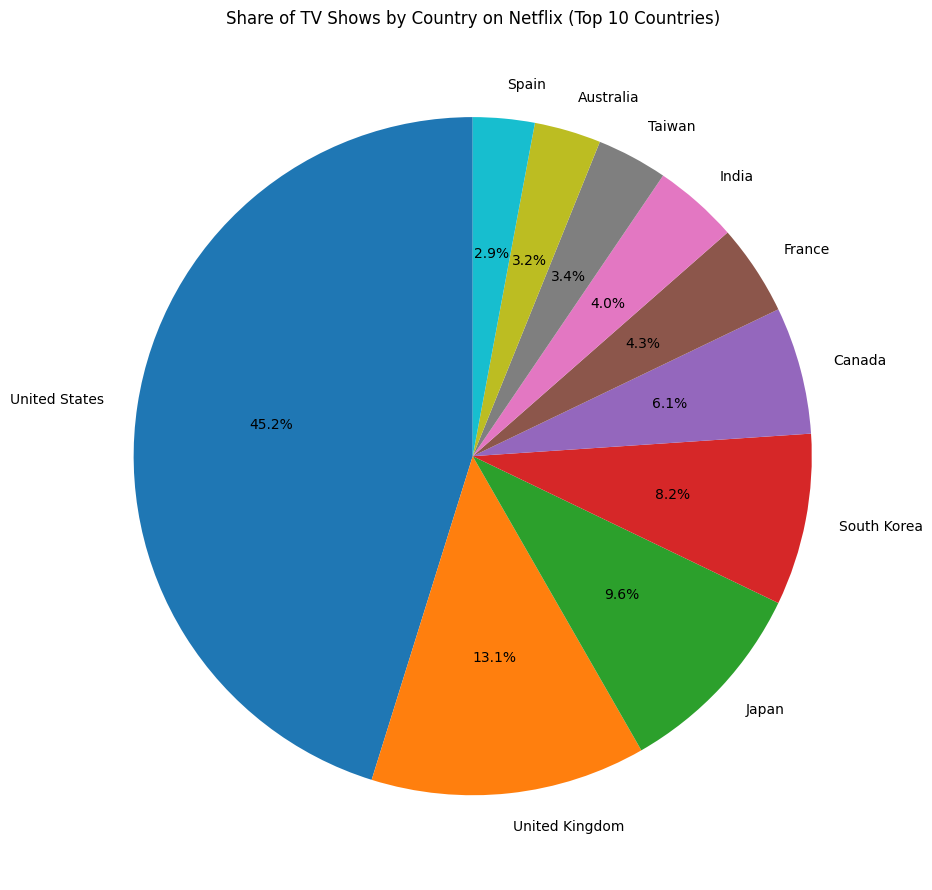

In [23]:
# Pie chart of unique countries where TV-shows are made per tv-show genre (top 10 countries only)

top_n = 10

# Explode list-of-countries into one country per row
show_countries = test_tv_shows_df["country"].explode()

# As a precaution, drop any 'empties' / 'missing' values present in the 'country' column
show_countries = show_countries.dropna()
show_countries = show_countries[show_countries != ""]   # remove empty strings
# (after explode, rows that were [] become NaN & get dropped)

'''
Compared to Amazon Prime dataset, Netflix has a larger variety of countries where TV shows are produced,
so we can show a larger number of countries in the pie chart for better representation of the data
'''

top_show_countries = show_countries.value_counts().head(top_n)

plt.figure(figsize=(14, 9))
top_show_countries.plot(kind="pie", autopct="%1.1f%%", startangle=90)
plt.ylabel("")
plt.title("Share of TV Shows by Country on Netflix (Top 10 Countries)")
plt.tight_layout()
plt.show()

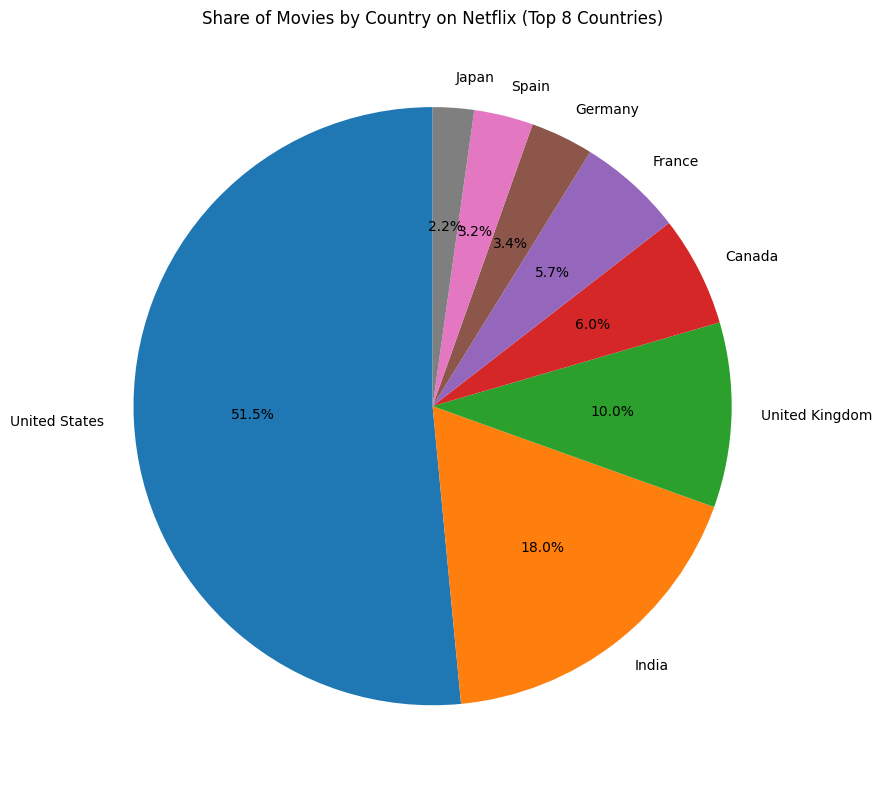

In [24]:
# Pie chart of unique countries where movies are produced per movie genre

top_n = 8  # limited to 8 for readability of pie chart

# Explode list-of-countries into one country per row
movie_countries = test_movies_df["country"].explode()

# As a precaution, drop any 'empties' / 'missing' values present in the 'country' column
movie_countries = movie_countries.dropna()
movie_countries = movie_countries[movie_countries != ""]          # just in case
# (after explode, rows that were [] become NaN & get dropped)

'''
Here we can only shown a more limited number of countries in the pie chart for movies,
so we pick top_n of 8 in order to have a readable chart. Though there are more countries in the dataset, 
the pie chart would become unreadable with too many slices, due to shares taken by 'other' countries 
that are more popular to film & produce media in than the rest.
'''

top_movie_countries = movie_countries.value_counts().head(top_n)

plt.figure(figsize=(12, 8))
top_movie_countries.plot(kind="pie", autopct="%1.1f%%", startangle=90)
plt.ylabel("")
plt.title("Share of Movies by Country on Netflix (Top 8 Countries)")
plt.tight_layout()
plt.show()

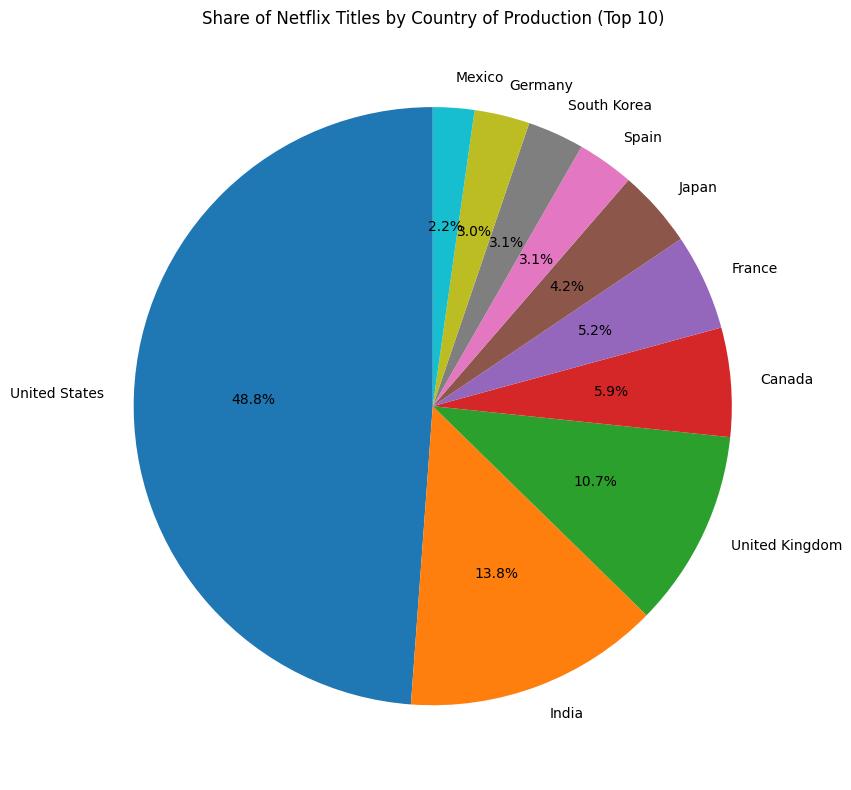

In [25]:
# Pie chart showing the share of Netflix titles by country of production

top_n = 10  # limited to 10 for readability of pie chart

# Explode converts each list into separate rows so each country is counted individually
media_countries = test_netflix_df["country"].explode()

# As a precaution, remove missing or empty entries that result from empty lists
media_countries = media_countries.dropna()
media_countries = media_countries[media_countries != ""]   # extra safeguard

# Count how many titles are associated with each country
top_media_countries = media_countries.value_counts().head(top_n)

# Plot pie chart
plt.figure(figsize=(12, 8))
top_media_countries.plot(
    kind="pie",
    autopct="%1.1f%%",
    startangle=90
)
plt.ylabel("")  # hide default y-axis label
plt.title("Share of Netflix Titles by Country of Production (Top 10)")
plt.tight_layout()
plt.show()